# House Price Prediction Using Linear and Polynomial Regression  

## Overview  
This project implements a **machine learning pipeline** to predict housing prices based on various socioeconomic and structural property features.  
The pipeline demonstrates:  

- **Linear Regression** as a baseline model.  
- **Polynomial Regression** with degrees 2, 3, and 4.  
- **Bias–variance tradeoff analysis** using residuals and R² metrics.  
- **Coefficient stability evaluation** via bootstrapping.  
- **Predictions on unseen housing data**.


## Dataset  
The dataset (`house_data.csv`) includes the following features:  

- `Crime` – per capita crime rate  
- `Residential` – proportion of residential land zoned for large lots  
- `NonRetail` – proportion of non-retail business acres per town  
- `NitricOxides` – nitric oxides concentration (parts per 10 million)  
- `Rooms` – average number of rooms per dwelling  
- `Age` – proportion of houses built before 1940  
- `Distance` – weighted distances to employment centres  
- `Accessibility` – index of accessibility to highways  
- `Tax` – full-value property-tax rate per $10,000  
- `PupilTeacher` – pupil–teacher ratio  
- `DisadvantagedPosition` – % lower status of the population  
- `Price` – **target variable** (house price in dollars)  

### Project Implementation:

__1. Train a linear regression model designed to predict house prices (dependent variable) based on the remaining independent variables.__

 To create this machine learning model, we need to create a linear regression model that can predict the house prices according to the
 dataset that we have. We need an 80% training model and a 20% testing of our machine learning model. Now we can create the
 training of our dataset and check by testing its performance

Dataset:

In [2]:
import pandas as pd

df=pd.read_csv('house_data.csv')
df

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Price
0,5.565,70.6,2.0635,24,666,17.16,8.79212,0.584,20.2,0.0,18.10,11.7
1,6.879,77.7,3.2721,8,307,9.93,0.62356,0.507,17.4,0.0,6.20,27.5
2,5.972,76.7,3.1025,4,304,9.97,0.34940,0.544,18.4,0.0,9.90,20.3
3,6.943,97.4,1.8773,5,403,4.59,1.22358,0.605,14.7,0.0,19.58,41.3
4,5.926,71.0,2.9084,24,666,18.13,15.57570,0.580,20.2,0.0,18.10,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...
394,6.019,65.3,2.4091,6,391,12.92,0.23912,0.585,19.2,0.0,9.69,21.2
395,5.936,80.3,2.7792,24,666,16.94,8.20058,0.713,20.2,0.0,18.10,13.5
396,6.590,40.4,5.4917,7,329,9.50,0.03537,0.433,16.1,34.0,6.09,22.0
397,6.405,85.4,2.7147,5,384,10.63,0.22876,0.520,20.9,0.0,8.56,18.6


Dataset is given clean and processed.

 Python Code:

Linear Regression Results:
R² (Training): 0.731
R² (Testing): 0.749
MSE (Training): 25.906
MSE (Testing): 20.392
RMSE (Training): 5.090
RMSE (Testing): 4.516

Feature Coefficients:
                  Feature  Coefficient
0                   Rooms     3.500579
1                     Age     0.002661
2                Distance    -1.384729
3           Accessibility     0.265454
4                     Tax    -0.011218
5   DisadvantagedPosition    -0.642487
6                   Crime    -0.123515
7            NitricOxides   -16.602090
8            PupilTeacher    -1.092543
9             Residential     0.040321
10              NonRetail     0.072883


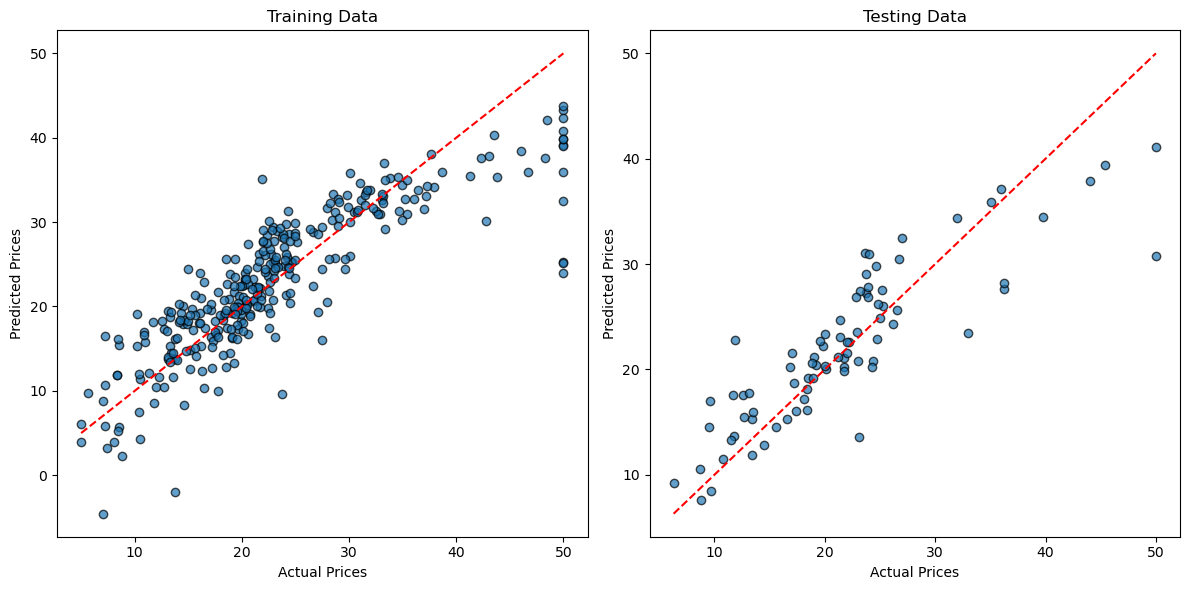

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

df=pd.read_csv('house_data.csv')
 
X = df.drop(columns=['Price'])  # Independent Variable x  
y = df['Price']                 # Dependent Variable y (house prices)

# Training Data 80% and Testing Data 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Create a Training Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
 
#Train and Test dependent variable y
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)
 
# Test the Final Model
print("Linear Regression Results:")
print(f"R² (Training): {r2_score(y_train, y_train_pred):.3f}")
print(f"R² (Testing): {r2_score(y_test, y_test_pred):.3f}")
print(f"MSE (Training): {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"MSE (Testing): {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RMSE (Training): {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"RMSE (Testing): {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
 
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coefficients)
 
# Visualize the predictions
plt.figure(figsize=(12, 6))
 
# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training Data')
 
# Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Testing Data')
plt.tight_layout()
plt.show()

Into this code we create and train a Linear Regression model to predict our houses prices from our house dataset features to our
 unseen dataset. Our independent variables are all the other property informations except of the price. Price here is comfirmed as a
 dependent variable and our target, that we need to compare, find and predict to the other unseen data.
 
 Above we trained the machine learning algorithm with 80% training by using the train model (x_train,y_train) and 20% testing using
 (x_test,y_test) model. Our code predicts: 1) R-squared score of the linear regressionthat is typically bounded into [0,1]. 2) Mean squared
 error predictes the average square of our original prices to our predicted prices. 3) Root mean squared error is just the squared error of
 MSE but predicts the average error of same unit variables. Both for MSE and RMSE when the value is lower the model performs better.

 From our results we can see that the R-squared training and testing data are not far rom each other, that means that our model is not
 overfitting. Same for the MSE training and testing data our results show that the average squared difference between our original and
 predicted house prices, show a small error between them, as a result the model is not overfitting. Moreover as MSE same RMSE shows
 that our model don't overfitt. The feature coefficients display the relation between our features and the house price

 __FEATURES__
 
* Room Coefficient(+3.5): These features shows that each house that includes additional rooms, for each room, the price increaces 3.5
 units.
 
* Age Coefficient(+0.0026): That feature shows that older houses tend to increase in price but in a very small degree that does not affect
 the final price.
 
* Distance Coefficient(-1.38): This faeture shows that when the distance increases by unit, the price decreases in 1.38 units.
 
* Accessibility Coefficient(+0.26): This feature displays that the better the facilities are, the higher (but in small increase) the price will be.
 
* Tax Coefficient(-0.011): This express that the higer a tax is, the lower the house price might be.
 
* DisadvantagedPosition (-0.64): Houses that are located in a disadvantaged position has a smaller value by lossing 0.64 unit for the
 specific area.
 
* Crime Coefficient(-0.124): The higher a crime in an area is, the lower the house price will be.

* NitricOxides (-16.6): The higher nitric oxide level is in an area, the lower the house prices tend to be.
 
* PupilTeacher (-1.09): This feautures explains that the places with low school quality, affect the house prices by reduxcing it 1.09 unit.
 
* Residential Coefficient(+0.04): The higher residential a place is, more slightly the prices increase.
 
* NonRetail (+0.073): Areas that have a non-retail position show a small increase in houses price.

__2.  Train three different polynomial regression models to predict house prices, with polynomial degrees of 2, 3, and 4.__

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Creat Polynomial Features in polynomial degrees 2, 3, 4
degrees = [2, 3, 4]
for degree in degrees:

    # Create Polynomial Features
    polynomial = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_polynomial = polynomial.fit_transform(X_train)
    X_test_polynomial = polynomial.transform(X_test)
    
    # Creat and Fit Linear Regression Model
    polynomial_model = LinearRegression()
    polynomial_model.fit(X_train_polynomial, y_train)
    
    # Generate Predictions
    y_train_pred_polynomial = polynomial_model.predict(X_train_polynomial)
    y_test_pred_polynomial = polynomial_model.predict(X_test_polynomial)
    
    # Print the Polynomial Degree Model
    print(f"\nPolynomial Regression (Degree {degree}) Results:")
    print(f"R² (Training): {r2_score(y_train, y_train_pred_polynomial):.3f}")
    print(f"R² (Testing): {r2_score(y_test, y_test_pred_polynomial):.3f}")
    print(f"MSE (Training): {mean_squared_error(y_train, y_train_pred_polynomial):.3f}")
    print(f"MSE (Testing): {mean_squared_error(y_test, y_test_pred_polynomial):.3f}")
    print(f"RMSE (Training): {np.sqrt(mean_squared_error(y_train, y_train_pred_polynomial)):.3f}")
    print(f"RMSE (Testing): {np.sqrt(mean_squared_error(y_test, y_test_pred_polynomial)):.3f}")


Polynomial Regression (Degree 2) Results:
R² (Training): 0.920
R² (Testing): 0.872
MSE (Training): 7.691
MSE (Testing): 10.370
RMSE (Training): 2.773
RMSE (Testing): 3.220

Polynomial Regression (Degree 3) Results:
R² (Training): 1.000
R² (Testing): -54028.085
MSE (Training): 0.039
MSE (Testing): 4387741.142
RMSE (Training): 0.196
RMSE (Testing): 2094.694

Polynomial Regression (Degree 4) Results:
R² (Training): 1.000
R² (Testing): -658.557
MSE (Training): 0.000
MSE (Testing): 53563.083
RMSE (Training): 0.000
RMSE (Testing): 231.437


 __RESULTS__
 
 1) For the polynomial regression (Degree 2), we can see that our R-squared training and testing values are nicely performed in both of
 our data. In that way the trained algorithm will work great in our unseen dataset. Same for RMSE they both have an accurate value with
 a small differencial error. That means that polynomial degree 2 fits better to our dataset.
 
 2) For the polynomial regression (Degree 3), we can comprehend that this model perfectly fits the training data but fails in a great
 degree on the testing data. The negative value shows that the predictions are worse than the original prices value. In this case, degree
 3 is overfitting our model and that means we better not use it.

 3) For the polynomial regression (Degree 4), same thing happens here as the polynomial degree 3. This model overfit here too.
 Conclusion: from our results we understand that only the polynomial regression (Degree 2) works well to our model, that fits our
 model for both training and testing data

__3. Evaluate the stability of each trained model by examining the extent to which the inferred beta coefficients depend on the training
 data.__

In this pyhton code we check the evaluation of polynomial regression. By the intercept meaning we refer to the constant term in the
 polynomial equation. It is the value of the dependent variable (outcome: here y prices) when all the independent variables (inputs: here
 x values) are equal to zero. The intercept express β0 when our x=0. And the beta coefficients refer to other beta variables β1, β2....,βn.
 Moreover, we use the stability of each trained model by examining the extent to which the inferred beta coefficients depend on the
 training data

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
import numpy as np
 
df = pd.read_csv('house_data.csv')
 
X = df.drop(columns=['Price'])  
y = df['Price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Function that evaluate model stability
def evaluate_model_stability(X_train, y_train, degrees, n_bootstrap=100):
    stability_results = {}
    
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        scaler = StandardScaler()
        X_train_poly = scaler.fit_transform(X_train_poly)
        
        coefficients_list = []
        
        for _ in range(n_bootstrap):
            
            # Resample the training data
            X_resampled, y_resampled = resample(X_train_poly, y_train, random_state=None)
            
            # Train the model
            model = LinearRegression()
            model.fit(X_resampled, y_resampled)
            
            # Record coefficients
            coefficients_list.append(model.coef_)
        
        # Convert coefficients to DataFrame
        coefficients_df = pd.DataFrame(coefficients_list, columns=[f"Beta_{i}" for i in range(X_train_poly.shape[1])])
        
        # Compute mean and standard deviation of coefficients
        coefficient_stats = {
            "Mean": coefficients_df.mean().values,
            "StdDev": coefficients_df.std().values}
        
        stability_results[degree] = coefficient_stats
    
    return stability_results
 
# Stability analysis for polynomial degrees 2, 3, 4
degrees = [2, 3, 4]
stability_results = evaluate_model_stability(X_train, y_train, degrees)
 
# Results
for degree, stats in stability_results.items():
    print(f"Stability Results for Degree {degree} Polynomial:")
    print("Mean Coefficients:", stats["Mean"])
    print("Standard Deviation of Coefficients:", stats["StdDev"])
    print()

Stability Results for Degree 2 Polynomial:
Mean Coefficients: [ 4.40116793e-11  1.99329444e+01  3.83398403e+00 -4.55358172e+01
  1.87007053e+01  9.50292144e+00 -9.31240037e+00 -1.53197284e+01
 -2.46923837e+00  1.98176831e+01  2.12538427e+01 -2.08909771e+00
 -2.65825062e+00 -3.94800154e+00  1.80782918e+01  3.88953372e-02
 -1.74444061e+01 -3.82694376e+00  7.46233150e+00  4.96923734e+00
 -1.39063079e+01 -9.28588428e+00 -1.59642016e+00  5.82985702e-02
  1.48412941e-01  1.27562058e+01 -1.03614670e+01 -6.03439882e+00
 -3.23237377e+00 -7.85218178e+00  4.84942349e+00  4.46232423e-01
  8.95715848e+00  1.43762008e+01 -1.02323279e+00 -3.08525075e+00
  5.52862811e+00 -2.60610056e+00  1.21071853e+01 -5.90510560e+00
 -4.53779587e+00  1.51385090e+00 -4.00525504e+01  4.84487231e+01
 -5.34404855e+00  2.52891767e+02 -6.97334140e+00 -2.39944510e+01
 -8.68749988e-01  6.60978937e+00 -8.32616308e+00 -5.35393424e+00
 -5.23573142e+02  9.31972096e+00  1.02698297e+01  4.35895989e+00
  6.62751826e+00  7.91360231

 This results provide the Mean and Standard Deviation of the coefficients for each trained polynomial degree 2, 3, 4 under some form of
 stability analysis.
 Mean coefficient results are the averge of coefficient of each polynomial degree, displaying that the model might have high variance or
 issues related to scale or numerical stability. Degree 2, present a 10^12 scale that explain that our model is poorly scaled and the
 model might not generate the results very well.

 Standard Deviation Coefficient actually present the coefficient vary across trials

 We have the each beta coefficient of our polynomial degrees. For instance: Suppose you have a degree-2 polynomial:
 
 Degree-2: y=β0+β1x+β2x^2

 Degree-3: y=β0+β1x+β2x^2+β3x^3

 Degree-4: y=β0+β1x+β2x^2+β3x^3+β4Χ^4

__4. Examine the bias and variance of each trained model by analysing the residuals and/or comparing the R-squared values for the
 training and testing data. Interpret the findings to determine the model that strikes the optimal balance between bias and
 variance__

Training R^2: 0.7312338225521164
Testing R^2: 0.7489054841446292


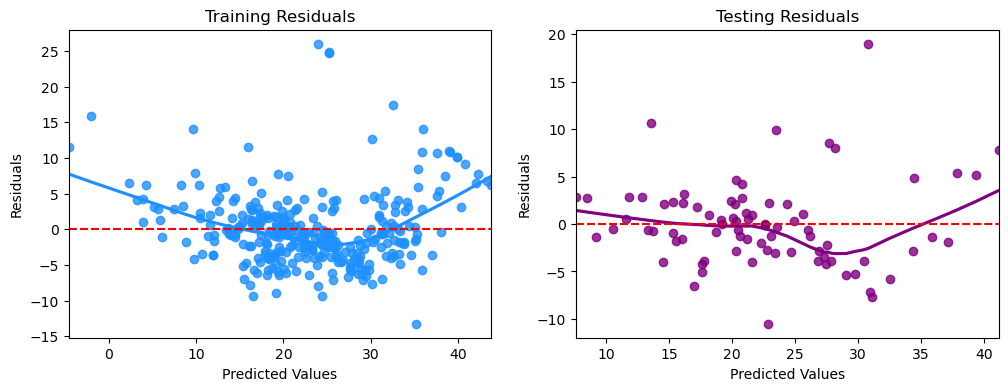

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
 
# 80% Training and 20% Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
 
# R^2 for training and testing
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
 
# Residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred
 
# R^2 values
print(f"Training R^2: {r2_train}")
print(f"Testing R^2: {r2_test}")
 
# Training residuals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.residplot(x=y_train_pred, y=y_train - y_train_pred, lowess=True, color="dodgerblue", label="Training Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Training Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
 
# Testing residuals
plt.subplot(1, 2, 2)
sns.residplot(x=y_test_pred, y=test_residuals, lowess=True, color="purple", label="Testing Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Testing Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

 In this task and dispalying code, we analyze the the comparison between testing and training residuals or errors alongside the R
squared scores. First, residuals are the difference of the original data and the pradicted one. Whe the error is close to zero (0), our
 model predictions are in the best accuration. Our results display that as we see for the left side that our model fits well the training
data. The residuals are close to the zero line, however we have a sign of bias where our data struggle to fit totally the model. We can
 also observe some overfiting points. For the right visual, we observe how the testing data works on our unseen data. We can see that
 the most of the points are not captured near zero, but they also aren't far away from the zero line. This observesion on our visual
 display the decrease model performance that happens in our unseen data. Furthermore, the relation between two R-squared measures
 for testing and training data are almost the same: 0.73 or 73% variance of training dataset and 0.75 or 75% testing dataset. In the
 training dataset the residual results are clustered near to zero, but result line is more parabolic than linear, this lead to bias result.
 Moreover, the extreme result training predictions indicate to extreme testing residuals, so we have a variance. In the testing residuals,
 the bias is almost the same as in training residuals, with a parabolic pattern. However the variace is slightly higher in the unseen
 dataset, because the data are large.

__1. Generate price predictions for the houses within the dataset located in the house_data.zip file.__

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data_path = 'house_data.csv'
house_data = pd.read_csv(data_path)
 
X = house_data.drop(columns=['Price'])
y = house_data['Price']
 
# Standardize features for using same scaler training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Predict prices from the model training
predicted_prices = model.predict(X_scaled)
 
# Creat the predictions to our House Dataset
house_data['Predicted_Price'] = predicted_prices
 
# Save Output
house_data.to_csv('house_data_new.csv', index=False)
 
# Save Output at the new house_data_new fold
results_path = 'house_data_new.csv'
results = pd.read_csv(results_path)
results.head()

C:\Users\kwnst\anaconda3_1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  return


,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Price,Predicted_Price
0,5.565,70.6,2.0635,24,666,17.16,8.79212,0.584,20.2,0.0,18.10,11.7,36.866630
1,6.879,77.7,3.2721,8,307,9.93,0.62356,0.507,17.4,0.0,6.20,27.5,55.129590
2,5.972,76.7,3.1025,4,304,9.97,0.34940,0.544,18.4,0.0,9.90,20.3,44.902395
3,6.943,97.4,1.8773,5,403,4.59,1.22358,0.605,14.7,0.0,19.58,41.3,44.253694
4,5.926,71.0,2.9084,24,666,18.13,15.57570,0.580,20.2,0.0,18.10,19.1,38.498452


This python code is a machine learning algorithm that predicts the prices of our unseen dataset. Takes a important valious all of our
 parameters and creates the predictions.

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
 
train_data = pd.read_csv("house_data.csv")
unseen_data = pd.read_csv("house_unseen.csv")

X_train = train_data.drop('Price', axis=1)
y_train = train_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Missing values and scale features
imputer = SimpleImputer(strategy='mean')  
scaler = StandardScaler()                 

X_train = imputer.fit_transform(X_train)  
X_train = scaler.fit_transform(X_train)   

model = LinearRegression()
model.fit(X_train, y_train)
 
# Process the unseen dataset
X_unseen = unseen_data  
X_unseen = imputer.transform(X_unseen)  
X_unseen = scaler.transform(X_unseen)

# Predictions on the unseen dataset
predicted_prices = model.predict(X_unseen)
 
# Display predictions
unseen_data['Predicted Price'] = predicted_prices
 
# Save Predictions
unseen_data.to_csv('house_unseen_predictions.csv', index=False)
 
# Show Predictions and our Features
unseen_data.head()

ImportError: cannot import name '_randomized_svd' from 'sklearn.utils.extmath' (C:\Users\kwnst\anaconda3_1\Lib\site-packages\sklearn\utils\extmath.py)

 Final here is the result of the unseen dataset after providing the training and testing model.
